# Introduction

In [ ]:
"""
What? Decision trees for classification on the breast cancer dataset plus visualisation

https://github.com/amueller/introduction_to_ml_with_python
Guido, Sarah, and Andreas Müller. Introduction to machine learning with python. Vol. 282. O'Reilly Media, 2016.
"""

# Import libraries/modules

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 8
rcParams['font.size'] = 15

# Load dataset

In [7]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# Creating the model: pre-pruning (scikit-learn)

In [ ]:
"""
Let’s look at the effect of pre-pruning in more detail on the Breast Cancer dataset. 
Then we build a model using the default setting of fully developing the tree (growing the tree until all 
leaves are PURE). 
"""

In [8]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [ ]:
"""
As expected, the accuracy on the training set is 100%—because the leaves are pure, the tree was grown deep enough 
that it could perfectly memorize all the labels on the training data.
"""

# Creating the model: pruning (scikit-learn)

In [ ]:
"""
If we don’t restrict the depth of a decision 
tree, the tree can become arbitrarily deep and complex. Unpruned trees are therefore prone to OVERFITTING and not 
generalizing well to new data. Now let’s apply pre-pruning to the tree, which will stop developing the tree before
we perfectly fit to the training data. One option is to stop building the tree after a certain depth has been 
reached. Here we set max_depth=4, MEANING only four consecutive questions can be asked. 
"""

In [9]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [ ]:
"""
This leads to a lower accuracy on the training set, BUT an improvement on the test set.
"""

# Analyzing Decision Trees

In [ ]:
"""
export_graphviz function writes a file in the .dot file format, which is a text file format for storing graphs.
"""

In [11]:
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

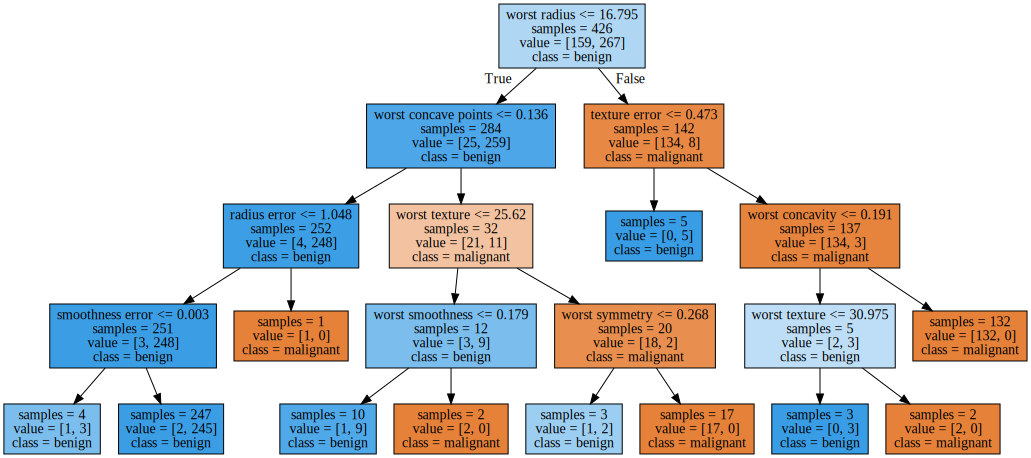

In [13]:
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# Feature importance in trees

In [ ]:
"""
Feature importance, which rates how important each feature is for the decision a tree makes. It is a number between 
0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature 
importances always sum to 1.
"""

In [14]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


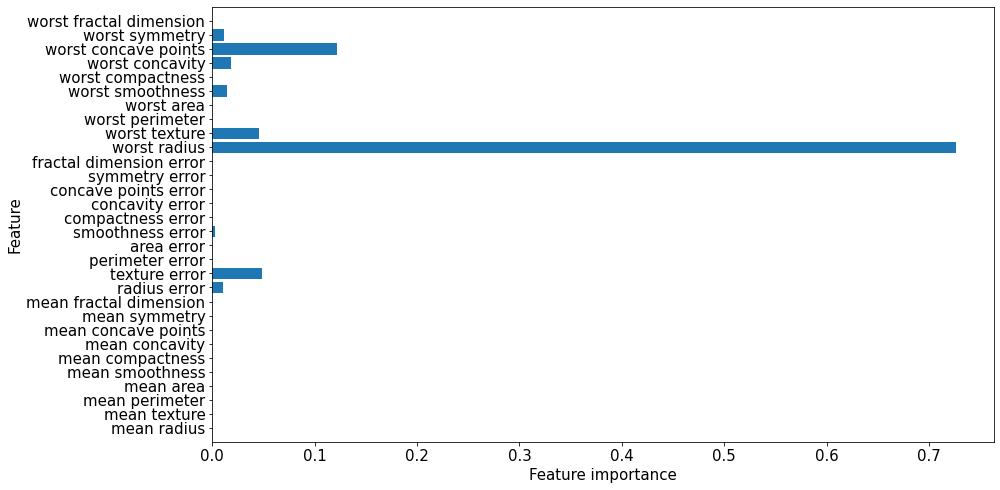

In [26]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

In [ ]:
"""
The feature used in the top split (“worst radius”) is by far the most important feature which confirms our 
observation in analyzing the tree that the first level already separates the two classes fairly well.
In contrast to the coefficients in linear models, feature importances are always positive, and don’t encode 
which class a feature is indicative of. The feature importances tell us that “worst radius” is important, but not
whether a high radius is indicative of a sample being benign or malignant. In fact, there might not be such a simple 
relationship between features and class, as you can see in the following example. 
"""